# Image Classification with Neural Networks

##### Classification is the task of categorizing the noun classes based on their features.

##### In most classification problems, machine learning algorithms will do the job.

##### But while classifying a large dataset of images, you will need to use a neural network.

In [5]:
#pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest,ytest) = fashion.load_data() #xtrain, ytrain for training, xtest, ytest for testing).

Image label:  5


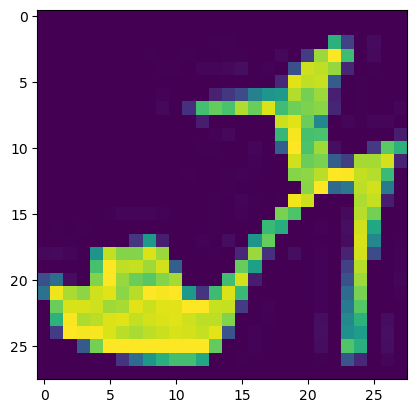

In [10]:
imgIndex= 9
image= xtrain[imgIndex]
print("Image label: ", ytrain[imgIndex])
plt.imshow(image)

In [12]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation= "relu"),
    keras.layers.Dense(100, activation= "relu"),
    keras.layers.Dense(10, activation= "softmax")
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
# Split the training data into training nad validation sets 
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [23]:
model.compile(loss= "sparse_categorical_crossentropy",
             optimizer= "sgd",
             metrics=["accuracy"])
history= model.fit(xtrain, ytrain, epochs= 30,
                  validation_data=(xvalid,yvalid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6845 - loss: 0.9905 - val_accuracy: 0.7992 - val_loss: 0.5562
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8271 - loss: 0.5004 - val_accuracy: 0.8512 - val_loss: 0.4371
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8422 - loss: 0.4480 - val_accuracy: 0.8604 - val_loss: 0.4106
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.8556 - loss: 0.4172 - val_accuracy: 0.8710 - val_loss: 0.3939
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8611 - loss: 0.3948 - val_accuracy: 0.8696 - val_loss: 0.3830
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8665 - loss: 0.3803 - val_accuracy: 0.8542 - val_loss: 0.3928
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8693 - loss: 0.3711 - val_accuracy: 0.8774 - val_loss: 0.3610
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8750 - l

In [35]:
new= xtest
predictions = model.predict(new)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
#train a classification network using neural network
classes = np.argmax(predictions, axis= 1)
print(classes)

[9 2 1 ... 8 1 5]


In [43]:
# Accuracy of Image Classification using Neural Network
from sklearn.metrics import accuracy_score

# Extract actual labels from the test dataset
actual_labels = ytest  # Assuming you want to evaluate predictions for the first 5 samples

# Calculate accuracy
accuracy = accuracy_score(actual_labels, classes)

print("Accuracy:", accuracy)

Accuracy: 0.852


With an accuracy of 85.2%, our neural network model, trained on the Fashion 
MNIST dataset using TensorFlow and Keras, showcases its ability to accurately 
classify clothing items based on their images, demonstrating the effectiveness 
of our model architecture and training approach.

In [45]:
# Precision, recall, and F1 score of Image Classification using Neural Network
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(actual_labels, classes, average='weighted')
recall = recall_score(actual_labels, classes, average='weighted')
f1 = f1_score(actual_labels, classes, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8622763309269296
Recall: 0.852
F1 Score: 0.8502749674862358


In [49]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 2.7 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [58]:
import cv2
import numpy as np

# Load the pre-trained model (assuming it's already trained and saved)
model = keras.applications.VGG16(weights='imagenet', include_top=True)

# Get the output of the last convolutional layer
last_conv_layer = model.get_layer('block5_conv3')

# Create a new model that outputs the feature maps of the last conv layer
cam_model = keras.Model(inputs=model.inputs, outputs=last_conv_layer.output)

# Get the weights of the output layer (Dense layer) of the original model
dense_weights = model.get_layer('predictions').get_weights()[0]

# Load an example image from your dataset (e.g., xtrain[imgIndex])
img = xtrain[imgIndex]

# Preprocess the image (resize to the input size of the model and apply normalization)
img = cv2.resize(img, (224, 224))
img = keras.applications.vgg16.preprocess_input(img)

# Expand the dimensions of the image to match the model's input shape
img = np.expand_dims(img, axis=0)

# Convert the grayscale image to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Get the feature maps of the last conv layer and the model's prediction
feature_maps, prediction = cam_model.predict(img_rgb), model.predict(img_rgb)

# Calculate the class activation map
cam = np.dot(feature_maps, dense_weights[:, prediction.argmax()])

# Resize the CAM to match the size of the original image
cam = cv2.resize(cam[0], (img.shape[2], img.shape[1]))

# Normalize the CAM
cam = (cam - cam.min()) / (cam.max() - cam.min())

# Apply colormap to visualize the CAM
heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)

# Overlay the CAM on the original image
cam_image = cv2.addWeighted(cv2.cvtColor(img[0], cv2.COLOR_RGB2BGR), 0.5, heatmap, 0.5, 0)

# Visualize the original image and the CAM
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cam_image)
plt.title('Class Activation Map (CAM)')
plt.show()

error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 224
